 # TITANIC - KAGGLE CHALLENGE  

### Titanic rescue prediction using Decision Tree


 

In [463]:
import pandas as pd 
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

# PART 1: Data Handling

In [464]:
data=pd.read_csv("titanic.csv")

In [465]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [466]:
#Using drop function to exclude collums I won't need. The parameter inplace true will change the table 
data.drop(["PassengerId", "Name","SibSp","Parch","Ticket","Fare","Cabin","Embarked"], axis="columns",inplace=True)
data.head()

Survived  Pclass     Sex   Age
0         0       3    male  22.0
1         1       1  female  38.0
2         1       3  female  26.0
3         1       1  female  35.0
4         0       3    male  35.0

In [467]:
# To define X I can simply drop the collumn I don't need, which is the Y 
# Here I am not using the parameter inplace, thus it is automaticaly set as "False" and doesn't change the table
X = data.drop(["Survived"],axis="columns")
# For the variable Y I can simply select the column Survived 
Y = data["Survived"] #Another way to declare: Y = data.Survived 
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [468]:
#The next step: create a pattern
#Pattern: Male = 0 / Female = 1
#This method map will create synonims in a dictionary
X.Sex = X.Sex.map({"male":0,"female":1})
X.head()

Pclass  Sex   Age
0       3    0  22.0
1       1    1  38.0
2       3    1  26.0
3       1    1  35.0
4       3    0  35.0

In [469]:
#Some filles with the ages are empy. Checkin out the first 10 lines
X.Age[0:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [470]:
# To fix this, we will use method fillna(). Inside the brackets I'll put the information to replace, which will be the mean
X.Age = X.Age.fillna(X.Age.mean())
X.Age[0:10]
#Index 5 was empty and is now showing the mean (29.699118)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

In [471]:
#Now want data to training (80%) and testing (20%) 
#Sklearn has a method to automaticaly make this division"train_test_split"
#Parameters: X, Y, percentage. If I put one, the method will automaticaly calculate the other 
train_test_split(X,Y,train_size = 0.8) # It is automaticaly setting 0.2 for testing
# The table will show X_training [712 rows x 3 columns], X_test [179 rows x 3 columns], Y_training[Length: 712, Y_test[Length: 179]

[     Pclass  Sex        Age
 415       3    1  29.699118
 578       3    1  29.699118
 506       2    1  33.000000
 266       3    0  16.000000
 775       3    0  18.000000
 ..      ...  ...        ...
 860       3    0  41.000000
 427       2    1  19.000000
 94        3    0  59.000000
 304       3    0  29.699118
 715       3    0  19.000000
 
 [712 rows x 3 columns],      Pclass  Sex        Age
 332       1    0  38.000000
 250       3    0  29.699118
 720       2    1   6.000000
 528       3    0  39.000000
 356       1    1  22.000000
 ..      ...  ...        ...
 320       3    0  22.000000
 813       3    1   6.000000
 156       3    1  16.000000
 879       1    1  56.000000
 236       2    0  44.000000
 
 [179 rows x 3 columns], 415    0
 578    0
 506    1
 266    0
 775    0
       ..
 860    0
 427    1
 94     0
 304    0
 715    0
 Name: Survived, Length: 712, dtype: int64, 332    0
 250    0
 720    1
 528    0
 356    1
       ..
 320    0
 813    0
 156    1
 879    1

In [472]:
# Now I create 4 variables to place each parameter
X_train,X_test,Y_train,Y_real=train_test_split(X,Y,train_size = 0.8)
#to see the lenght:
len(X_train)

712

In [473]:
len(X_test)

179

In [474]:
#Note that X_test is not in order. It presents it ramdomly to prevent model from becoming biased 
X_test

Pclass  Sex   Age
599       1    0  49.0
508       3    0  28.0
829       1    1  62.0
427       2    1  19.0
476       2    0  34.0
..      ...  ...   ...
355       3    0  28.0
276       3    1  45.0
15        2    1  55.0
230       1    1  35.0
562       2    0  28.0

[179 rows x 3 columns]

#  Decision Tree   

In [475]:
#If it is empty it will create it with as many levels it can. TO avoid this we put max_dep to determine how many levels we want
#The sext parameter will be the criteria. If I dont put it will use gini. If I wanted to use entropy I'd have to put it. I want to use gini, so I don't need to put it
model_dt = tree.DecisionTreeClassifier(criterion= 'entropy', splitter= 'best', max_depth=none)    #model with deph 3
model_dt

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [476]:
#Now the method fit will adjust data, trainning the model
model_dt.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [477]:
#Using predict method to test the model
model_dt.predict(X_test) #always gets x and retuns y

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0], dtype=int64)

In [478]:
#Storing the result in a variable 
Y_pred_dt = model_dt.predict(X_test)
Y_pred_dt

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0], dtype=int64)

In [479]:
#Dataframe to show Y real and Y predicted:
#Using a dictionary to separate columns  
result = pd.DataFrame({"Survided REAL": Y_real, "Survived PREDICTION": Y_pred_dt})
result

Survided REAL  Survived PREDICTION
599              1                    0
508              0                    0
829              1                    1
427              1                    1
476              0                    0
..             ...                  ...
355              0                    0
276              0                    0
15               1                    1
230              1                    1
562              0                    0

[179 rows x 2 columns]

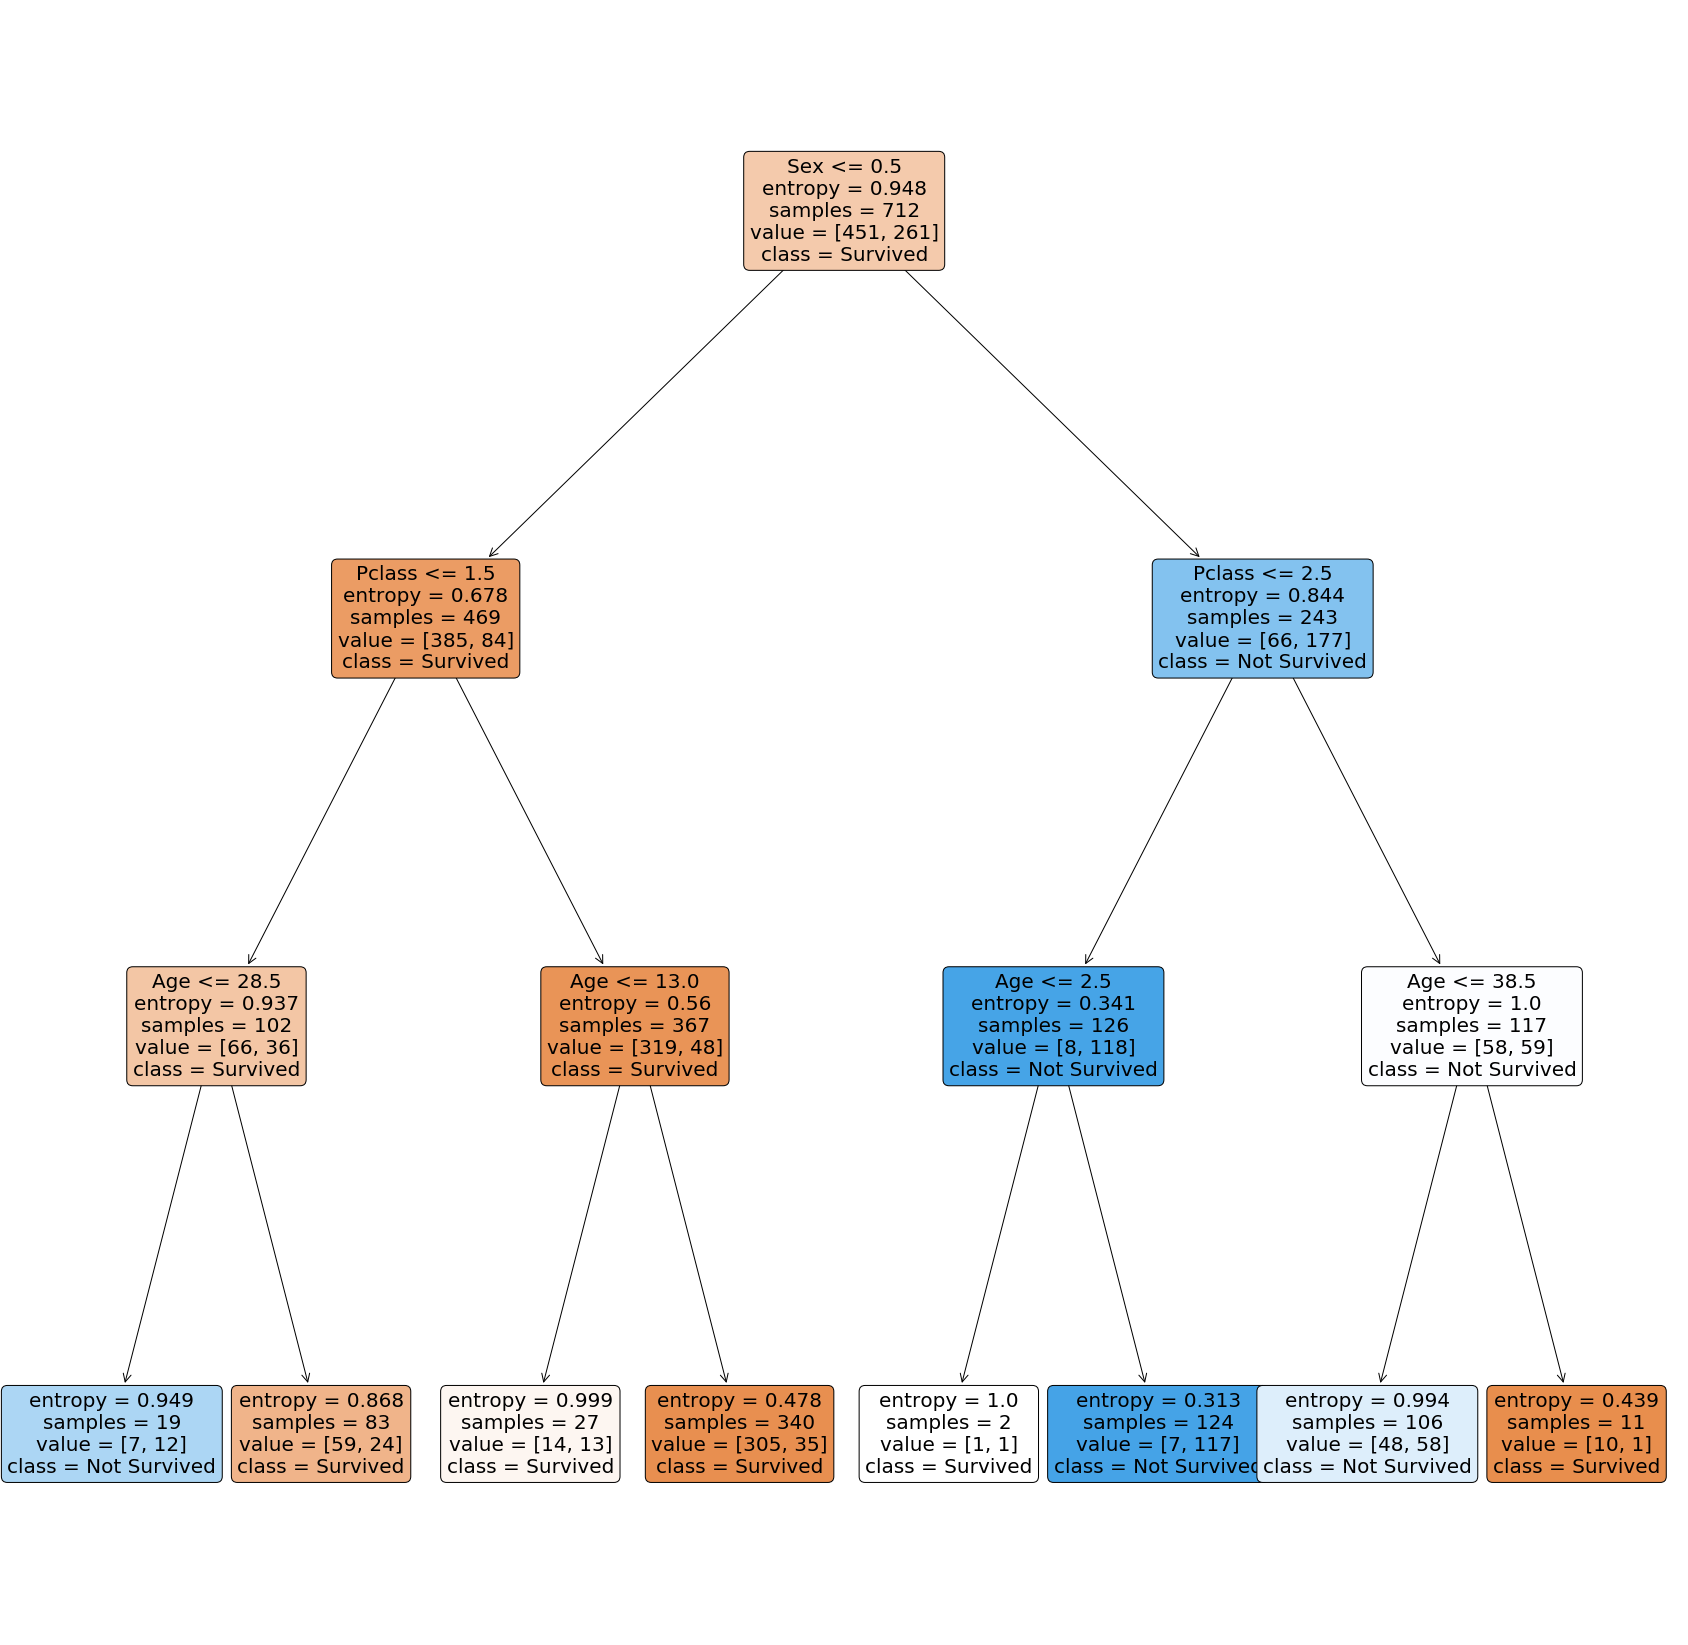

In [480]:
# Plotting the tree
plt.figure(figsize=(30,30))
graph_tree = plot_tree (model_dt,feature_names = ['Pclass','Sex','Age'],
                        class_names = ['Survived','Not Survived'],
                        filled=True,rounded=True,fontsize = 20)

 ## Decision Tree - Performance Measurement

#### a) Accuracy

In [481]:
# Here is another way to find the accuracy score
from sklearn import metrics
accuracy = metrics.accuracy_score(Y_real,Y_pred_dt)  
print ("Accuracy is : "+  str (accuracy))
precision_dt = metrics.precision_score(Y_real,Y_pred_dt)  
print("Precision is :"+ str( precision_dt))
recall_dt = metrics.recall_score(Y_real,Y_pred_dt)  
print(" Recall is :" + str(recall_dt))
confusion_matrix_dt = metrics.confusion_matrix(Y_real,Y_pred_dt)
print (str(confusion_matrix_dt) +  ":is the Confusion Matrix")

Accuracy is : 0.770949720670391
Precision is :0.7702702702702703
 Recall is :0.7037037037037037
[[81 17]
 [24 57]]:is the Confusion Matrix


#### b) Precision

In [482]:
# Precision = true positive / true positive + false positive
precision_dt = metrics.precision_score(Y_real,Y_pred_dt)  
precision_dt

0.7702702702702703

#### c) Recall

In [483]:
# Recall = true positive / true positive + false negative
recall_dt = metrics.recall_score(Y_real,Y_pred_dt)  
recall_dt

0.7037037037037037

#### d) Confusion matrix

In [484]:
import seaborn as sns
confusion_matrix_dt = metrics.confusion_matrix(Y_real,Y_pred_dt)
confusion_matrix_dt

array([[81, 17],
       [24, 57]], dtype=int64)

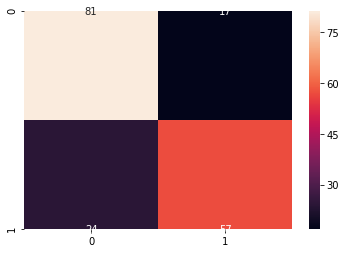

In [485]:
# 0,0: 53 => True Negative
# 0,1: 0  => False Positive 
# 1,0: 23 => False Negative 
# 1,1: 4  => True Positive 
sns.heatmap(confusion_matrix_dt, annot=True)

#### e) AUC - ROC Curve

In [486]:
auc_dt = metrics.roc_auc_score(Y_real, Y_pred_dt) # as the documentation explain, the main parameters are: y_true and y_score
auc_dt

0.7651171579743008

## Decision Tree - k-Fold Cross-Validation

Now using kfold, a model validation technique which is not using my pre-trained model


In [487]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [488]:
kf_dt = KFold(n_splits=5,shuffle=True)  
cv_dt = cross_val_score(model_dt, X, Y, cv=kf_dt)
np.mean(cv_dt)

0.8002134203753688